In [55]:
from cvd_color_palette_generator.binary import *
from cvd_color_palette_generator.sequential import *
from cvd_color_palette_generator.categorical import *
from cvd_color_palette_generator.diverging import *

from cvd_color_palette_generator.module2 import *
from cvd_color_palette_generator.module1 import create_choropleth

In [56]:
from daltonlens import simulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interact, Dropdown
import ipywidgets as widgets
from cvd_color_palette_generator.aux_functions import show_colors, lab_cmap_to_rgb_cmap

## funciones auxiliares

In [57]:
def show_cvd(result_cmap, cvd, simulator, representation_func, severity=1):
  im_resultado = np.asarray([result_cmap])
  #cvd_im = {}

  for nombre in cvd:
    if nombre == 'protan':
      protan = simulator.simulate_cvd(im_resultado, deficiency=simulate.Deficiency.PROTAN, severity=severity)
      print("Protanopia")
      show_colors(protan[0], axis_state='off')
      representation_func(protan[0])

      save_cvd_colorpalette(protan[0], nombre)
      # show_simulated_image("protan", protan)
      #cvd_im["protan"] = protan[0]
    if nombre == 'deutan':
      deutan = simulator.simulate_cvd(im_resultado, deficiency=simulate.Deficiency.DEUTAN, severity=severity)
      # show_simulated_image("deutan", deutan)
      print("Deuteranopia")
      show_colors(deutan[0], axis_state='off')
      representation_func(deutan[0])
      save_cvd_colorpalette(deutan[0], nombre)
      # cvd_im["deutan"] = deutan[0]
    if nombre == 'tritan':
      tritan = simulator.simulate_cvd(im_resultado, deficiency=simulate.Deficiency.TRITAN, severity=severity)
      # cvd_im["tritan"] = tritan[0]
      # show_simulated_image("tritan", tritan)
      print("Tritanopia")
      show_colors(tritan[0], axis_state='off')
      representation_func(tritan[0])
      save_cvd_colorpalette(tritan[0], nombre)

In [58]:
def set_binary_parameters(cmap, cvd, fixed_side, parameter, simulator):

  bs = binary_selection_cvd(cmap, cvd)
  result_cmap_lab = binary_representation_selected([cmap[i] for i in bs], fixed_side, parameter)
  result_cmap = lab_cmap_to_rgb_cmap(result_cmap_lab)

  result_mlist = mcolors.ListedColormap(result_cmap)

  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))

  fig, ax = plt.subplots(figsize=(6, 2))
  ax.imshow(gradient, aspect='auto', cmap=result_mlist)
  ax.set_axis_off()
  plt.savefig('test_binary.png')
  plt.show()

  save_colormap(result_cmap)

  result_cmap = np.multiply(result_cmap, 255)
  result_cmap = (np.rint(result_cmap)).astype(int)

  print("chequeo de funcionalidad:")
  check_binary(result_cmap)
  print("chequeo de desviación de colores:")
  binary_deviation(cmap, bs, result_cmap)
  save_colorpalette(result_cmap)

  show_cvd(result_cmap, cvd, simulator, check_binary)

In [59]:
def set_sequential_parameters(cmap, cvd, left_l, right_l, simulator):
  ss = sequential_selection_cvd(cmap, cvd)

  result_cmap_lab = sequential_representation_selected([cmap[i] for i in ss], left_l, right_l)
  result_cmap = lab_cmap_to_rgb_cmap(result_cmap_lab)

  result_mlist = mcolors.ListedColormap(result_cmap)

  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))

  fig, ax = plt.subplots(figsize=(6, 2))
  ax.imshow(gradient, aspect='auto', cmap=result_mlist)
  ax.set_axis_off()
  plt.savefig('test_sequential.png')
  plt.show()

  save_colormap(result_cmap)

  result_cmap = np.multiply(result_cmap, 255)
  result_cmap = (np.rint(result_cmap)).astype(int)

  print("chequeo de funcionalidad:")
  check_sequential(result_cmap)
  print("chequeo de desviación de colores:")
  sequential_deviation(cmap, ss, result_cmap)

  save_colorpalette(result_cmap)

  show_cvd(result_cmap, cvd, simulator, check_sequential)

In [60]:
def set_categorical_parameters(cmap, cvd, luminosity_equality, min_delta_e, simulator):
  ss = categorical_selection_cvd(cmap, cvd, min_delta_e)

  result_cmap_lab = categorical_representation_selected([cmap[i] for i in ss], luminosity_equality)

  result_cmap = lab_cmap_to_rgb_cmap(result_cmap_lab)

  result_mlist = mcolors.ListedColormap(result_cmap)


  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))

  fig, ax = plt.subplots(figsize=(6, 2))
  ax.imshow(gradient, aspect='auto', cmap=result_mlist)
  ax.set_axis_off()
  plt.savefig('test_cathegorical.png')
  plt.show()

  save_colormap(result_cmap)

  result_cmap = np.multiply(result_cmap, 255)
  result_cmap = (np.rint(result_cmap)).astype(int)

  print("chequeo de funcionalidad:")
  check_categorical(result_cmap)
  print("chequeo de desviación de colores:")
  categorical_deviation(cmap, ss, result_cmap)

  save_colorpalette(result_cmap)

  show_cvd(result_cmap, cvd, simulator, check_categorical)

In [61]:
def set_diverging_parameters(cmap, cvd, fixed_side, parameter, center_whiteness, simulator):


  ss = diverging_selection_cvd(cmap, cvd)
  result_cmap_lab = diverging_representation_selected([cmap[i] for i in ss], fixed_side, parameter, center_whiteness)
  result_cmap = [lab_to_rgb(LabColor(l,a,b)) for (l,a,b) in result_cmap_lab]

  result_cmap = lab_cmap_to_rgb_cmap(result_cmap_lab)


  result_mlist = mcolors.ListedColormap(result_cmap)

  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))

  fig, ax = plt.subplots(figsize=(6, 2))
  ax.imshow(gradient, aspect='auto', cmap=result_mlist)
  ax.set_axis_off()
  plt.savefig('test_divergency.png')
  plt.show()

  save_colormap(result_cmap)

  result_cmap = np.multiply(result_cmap, 255)
  result_cmap = (np.rint(result_cmap)).astype(int)

  print("chequeo de funcionalidad:")
  check_diverging(result_cmap)
  print("chequeo de desviación de colores:")
  diverging_deviation(cmap, ss, result_cmap)

  save_colorpalette(result_cmap)

  show_cvd(result_cmap, cvd, simulator, check_diverging)

In [62]:
def select_binary_representation(cmap, cvd, simulator, fixed_side):
    interact(set_binary_parameters,
             cmap = widgets.fixed(cmap),
             cvd = widgets.fixed(cvd),
             fixed_side=widgets.ToggleButtons(options=fixed_side.keys(), description='escoger lado:', disabled=False, button_style='', tooltips=['Fijar color izquierdo', 'Fijar color derecho']),
             parameter=widgets.IntSlider(value=1, min=1, max=100, step=1, description='Parámetro:'), 
             simulator= widgets.fixed(simulator)
             )

In [63]:
def select_sequential_representation(cmap, cvd, simulator, fixed_side):
    ss = sequential_selection_cvd(cmap, cvd)
    cmap_lab = rgb_cmap_to_lab_cmap(cmap)
    value_left_l = cmap_lab[ss[0]][0]
    value_right_l = cmap_lab[ss[1]][0]
    interact(set_sequential_parameters,
            cmap = widgets.fixed(cmap),
            cvd = widgets.fixed(cvd),
            left_l = widgets.FloatText(
                value=value_left_l,
                description='Luminosidad Izquierda:',
                disabled=False
            ),
            right_l = widgets.FloatText(
                value=value_right_l,
                description='Luminosidad Izquierda:',
                disabled=False
            ),
            simulator= widgets.fixed(simulator)
            )

In [64]:
def select_categorical_representation(cmap, cvd, simulator, fixed_side):
    interact(set_categorical_parameters,
               cmap = widgets.fixed(cmap),
               cvd = widgets.fixed(cvd),
               luminosity_equality=widgets.IntSlider(
                   value=1,
                   min=1,
                   max=100,
                   step=1,
                   description='Igualdad de luminosidad:',
                   ),
               min_delta_e=widgets.IntSlider(
                   value=12,
                   min=12,
                   max=100,
                   step=1,
                   description='Mínimo valor de delta_e:',
                   ),
               simulator= widgets.fixed(simulator)
               )

In [65]:
def select_diverging_representation(cmap, cvd, simulator, fixed_side):
    interact(set_diverging_parameters,
               cmap = widgets.fixed(cmap),
               cvd = widgets.fixed(cvd),
               fixed_side=widgets.ToggleButtons(
                   options=fixed_side.keys(),
                   description='escoger lado:',
                   disabled=False,
                   button_style='', # 'success', 'info', 'warning', 'danger' or ''
                   tooltips=['Fijar color izquierdo', 'Fijar color derecho'],
                   ),
               parameter=widgets.IntSlider(
                   value=1,
                   min=1,
                   max=100,
                   step=1,
                   description='Parámetro:',
                   ),
               center_whiteness=widgets.IntSlider(
                   value=95,
                   min=50,
                   max=100,
                   step=1,
                   description='Luminosidad central:',
                   ),
               simulator= widgets.fixed(simulator)
               )

## representacion

In [66]:
# Diccionario de funciones

representation_funcs = {
    'Binario': select_binary_representation,
    'Secuencial': select_sequential_representation,
    'Categorico': select_categorical_representation,
    'Divergente': select_diverging_representation
}

simuladores = {
    'Brettel1997': simulate.Simulator_Brettel1997(),
    'Vienot1999': simulate.Simulator_Vienot1999(),
    'Machado2009': simulate.Simulator_Machado2009(),
    'Vischeck': simulate.Simulator_Vischeck(),
    'CoblisV1': simulate.Simulator_CoblisV1(),
    'CoblisV2': simulate.Simulator_CoblisV2()
}

fixed_side = {'left': 0, 'right': 1}

  # return cvd_im
def upload_image(uploader, k):
  if(not uploader):
    print("Ingresa una imagen")
    return
  else:
    uploaded_file = list(uploader.values())[0]['content']
    cmap = save_and_load_image(uploaded_file, 'uploaded_image.jpg', k)
    show_colors(cmap, axis_state='off')
    interact(select_representation,
             cmap = widgets.fixed(cmap),
             representation=Dropdown(options=representation_funcs.keys(), description='Representación'),
             simulation=Dropdown(options=simuladores.keys(), description='Simulador'),
             cvd_protan=widgets.Checkbox(
               value=False,
               description='Protan',
               disabled=False,
               indent=True
             ),
             cvd_deutan=widgets.Checkbox(
               value=False,
               description='Deutan',
               disabled=False,
               indent=True
             ),
             cvd_tritan=widgets.Checkbox(
               value=False,
               description='Tritan',
               disabled=False,
               indent=True
             ),
             )

# Función para mostrar el colormap
def select_representation(cmap, representation, simulation, cvd_protan, cvd_deutan, cvd_tritan):
    simulator = simuladores.get(simulation)
    im_cmap = np.asarray([cmap])

    cvd = {}
    if cvd_protan:
      protan = simulator.simulate_cvd(im_cmap, deficiency=simulate.Deficiency.PROTAN, severity=1)
      cvd["protan"] = protan[0]
    if cvd_deutan:
      deutan = simulator.simulate_cvd(im_cmap, deficiency=simulate.Deficiency.DEUTAN, severity=1)
      cvd["deutan"] = deutan[0]
    if cvd_tritan:
      tritan = simulator.simulate_cvd(im_cmap, deficiency=simulate.Deficiency.TRITAN, severity=1)
      cvd["tritan"] = tritan[0]

    representation_funcs[representation](cmap, cvd, simulator, fixed_side)



interact(upload_image,
         uploader = widgets.FileUpload(
             accept='.jpg, .jpge, .png, image/*', # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
             multiple=False  # True to accept multiple files upload else False
             ),
            k = widgets.IntSlider(
                value=20,
                min=1,
                max=30,
                step=1,
                description='Número de colores:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='d'
            )
      )

interactive(children=(FileUpload(value={}, accept='.jpg, .jpge, .png, image/*', description='Upload'), IntSlid…

<function __main__.upload_image(uploader, k)>

## Ejemplos de Uso de la paleta

In [75]:
color_palettes = load_colorpalette()
for c in color_palettes:
  print(c)
  fig = create_choropleth(color_palettes[c])
  fig.show()

original


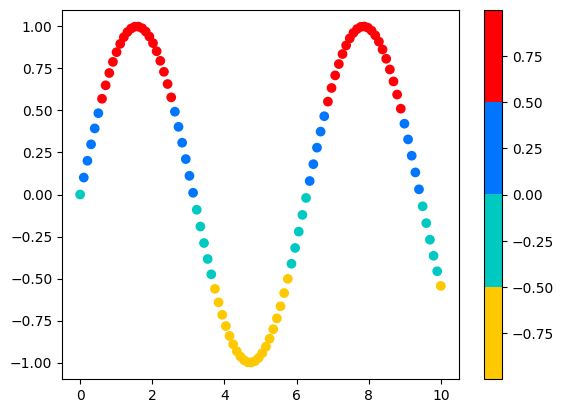

In [76]:
custom_cmap = load_colormap()
x = np.linspace(0, 10, 100)
y = np.sin(x)
# Create a scatter plot with the custom colormap
plt.scatter(x, y, c=y, cmap=custom_cmap)
plt.colorbar()
plt.show()

Text(0, 0.5, 'Fracción de los viajes')

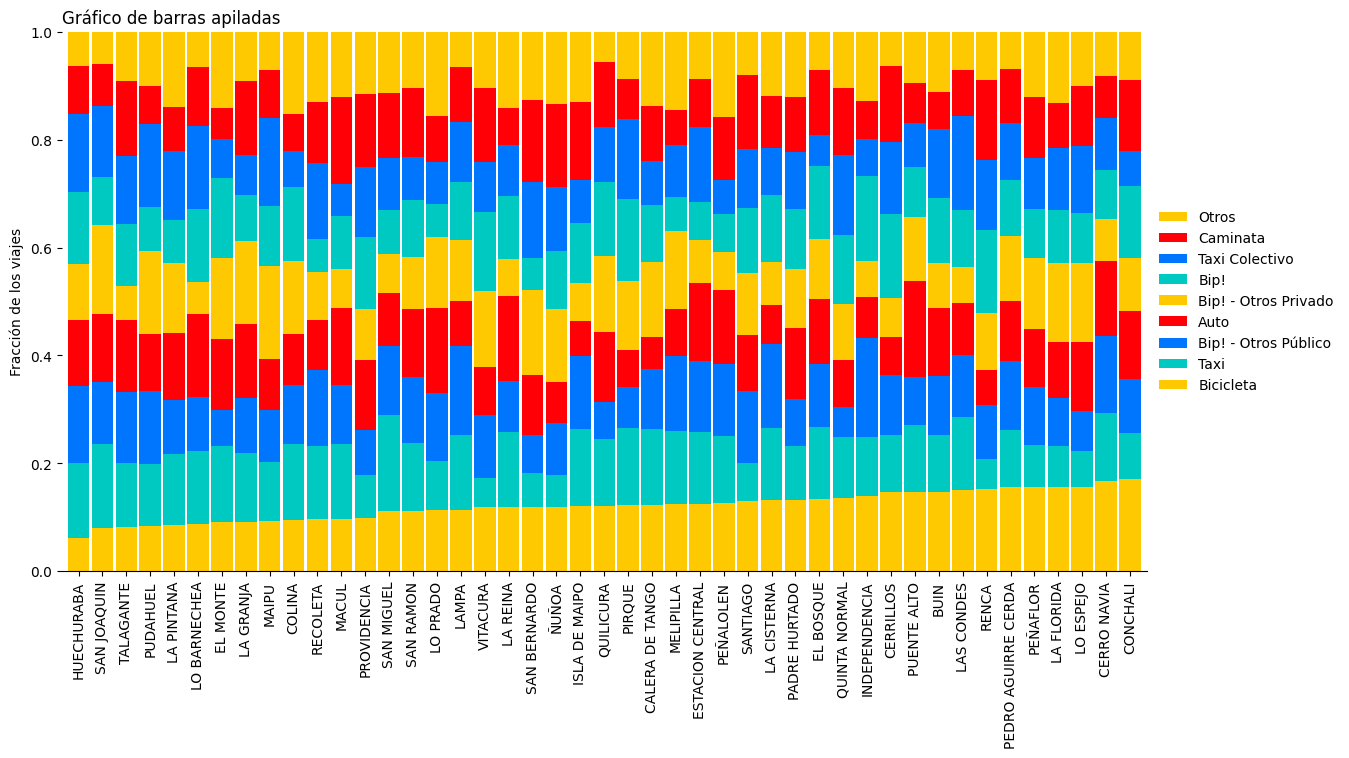

In [78]:
Comuna = ["BUIN", "CALERA DE TANGO", "CERRILLOS", "CERRO NAVIA", "COLINA", "CONCHALI", "EL BOSQUE", 
                "EL MONTE", "ESTACION CENTRAL", "HUECHURABA", "INDEPENDENCIA", "ISLA DE MAIPO", "LA CISTERNA", 
                "LA FLORIDA", "LA GRANJA", "LA PINTANA", "LA REINA", "LAMPA", "LAS CONDES", "LO BARNECHEA", 
                "LO ESPEJO", "LO PRADO", "MACUL", "MAIPU", "MELIPILLA", "PADRE HURTADO", "PEDRO AGUIRRE CERDA", 
                "PEÑAFLOR", "PEÑALOLEN", "PIRQUE", "PROVIDENCIA", "PUDAHUEL", "PUENTE ALTO", "QUILICURA", 
                "QUINTA NORMAL", "RECOLETA", "RENCA", "SAN BERNARDO", "SAN JOAQUIN", "SAN MIGUEL", "SAN RAMON", "SANTIAGO",
                "TALAGANTE", "VITACURA", "ÑUÑOA"]
custom_cmap = load_colormap()
np.random.seed(0)
# Crear el DataFrame
data = {
    'Comuna': ["BUIN", "CALERA DE TANGO", "CERRILLOS", "CERRO NAVIA", "COLINA", "CONCHALI", "EL BOSQUE", 
                "EL MONTE", "ESTACION CENTRAL", "HUECHURABA", "INDEPENDENCIA", "ISLA DE MAIPO", "LA CISTERNA", 
                "LA FLORIDA", "LA GRANJA", "LA PINTANA", "LA REINA", "LAMPA", "LAS CONDES", "LO BARNECHEA", 
                "LO ESPEJO", "LO PRADO", "MACUL", "MAIPU", "MELIPILLA", "PADRE HURTADO", "PEDRO AGUIRRE CERDA", 
                "PEÑAFLOR", "PEÑALOLEN", "PIRQUE", "PROVIDENCIA", "PUDAHUEL", "PUENTE ALTO", "QUILICURA", 
                "QUINTA NORMAL", "RECOLETA", "RENCA", "SAN BERNARDO", "SAN JOAQUIN", "SAN MIGUEL", "SAN RAMON", "SANTIAGO",
                "TALAGANTE", "VITACURA", "ÑUÑOA"]*9,
    'ModoDifusion': ['Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo',
                     'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo',
                     'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo',
                     'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo',
                     'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo',
                     'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto',
                     'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto',
                     'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto',
                     'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto',
                     'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto',
                     'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta',
                     'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta',
                     'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta',
                     'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta',
                     'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta',
                     'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!',
                     'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!',
                     'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!',
                     'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!',
                     'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!',
                     'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado',
                     'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado',
                     'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado',
                     'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado',
                     'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado',
                     'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público',
                     'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público',
                     'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público',
                     'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público',
                     'Caminata', 'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público',
                     'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata',
                     'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata',
                     'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata',
                     'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata',
                     'Otros', 'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata',
                     'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros',
                     'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros',
                     'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros',
                     'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros',
                     'Taxi', 'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros',
                     'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi',
                     'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi',
                     'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi',
                     'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi',
                     'Taxi Colectivo', 'Auto', 'Bicicleta', 'Bip!', 'Bip! - Otros Privado', 'Bip! - Otros Público', 'Caminata', 'Otros', 'Taxi',
                     ],
    'Value': np.random.randint(35, 100, 45*9)
}

df = pd.DataFrame(data)

# Agrupar por 'Category1' y 'Category2'
grouped = df.groupby(['Comuna', 'ModoDifusion']).sum()

# Aplicar unstack
result_unstacked = grouped.unstack()
df = result_unstacked['Value']


def normalize_rows(df):
    return df.div(df.sum(axis=1), axis=0)


def barchart(
    ax,
    df,
    categories=None,
    stacked=False,
    normalize=True,
    sort_items=False,
    sort_categories=False,
    fill_na_value=None,
    bar_width=0.9,
    legend=True,
    legend_args=None,
    return_df=False,
    **kwargs
):
    with open('custom_cmap.json', 'r') as f:
        colormap_data = json.load(f)
    sns.set_palette(colormap_data['colores']) # paleta de colores aca

    if categories is not None:
        df = df[categories]

    if fill_na_value is not None:
        df = df.fillna(fill_na_value)

    if normalize:
        df = df.pipe(normalize_rows)

    if sort_categories:
        sort_values = df.mean(axis=0).sort_values(ascending=False)
        df = df[sort_values.index].copy()

    if sort_items:
        df = df.sort_values(df.columns[0])

    df.plot.bar(
        ax=ax,
        stacked=stacked,
        width=bar_width,
        edgecolor="none",
        legend=legend,
        **kwargs
    )

    if legend:
        if legend_args is None:
            legend_args = dict(
                bbox_to_anchor=(1.0, 0.5), loc="center left", frameon=False
            )
        handles, labels = map(reversed, ax.get_legend_handles_labels())
        ax.legend(handles, labels, **legend_args)

    ax.ticklabel_format(axis="y", useOffset=False, style="plain")
    sns.despine(ax=ax, left=True)

    if normalize:
        ax.set_ylim([0, 1])

    if return_df:
        return df


fig, ax = plt.subplots(figsize=(14, 7))
barchart( ax, df, stacked=True, sort_categories=True, sort_items=True)

ax.set_title("Gráfico de barras apiladas", loc="left")
ax.set_ylim([0, 1])
ax.set_xlabel("")
ax.set_ylabel("Fracción de los viajes")

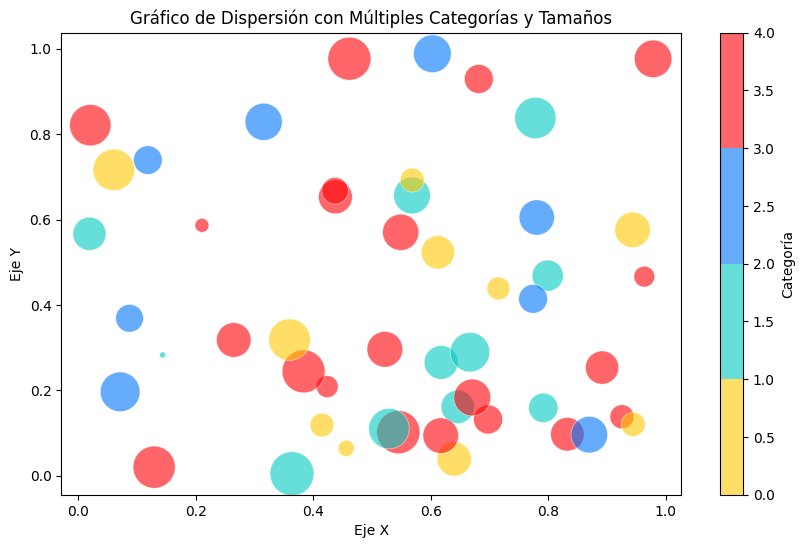

In [79]:
# Generar datos ficticios
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)
sizes = 1000 * np.random.rand(50)
categories = np.random.randint(0, 5, 50)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=categories, cmap=custom_cmap, alpha=0.6, edgecolors='w', linewidth=0.5)

# Añadir una barra de color
plt.colorbar(scatter, label='Categoría')

# Personalizar el gráfico
plt.title('Gráfico de Dispersión con Múltiples Categorías y Tamaños')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.show()


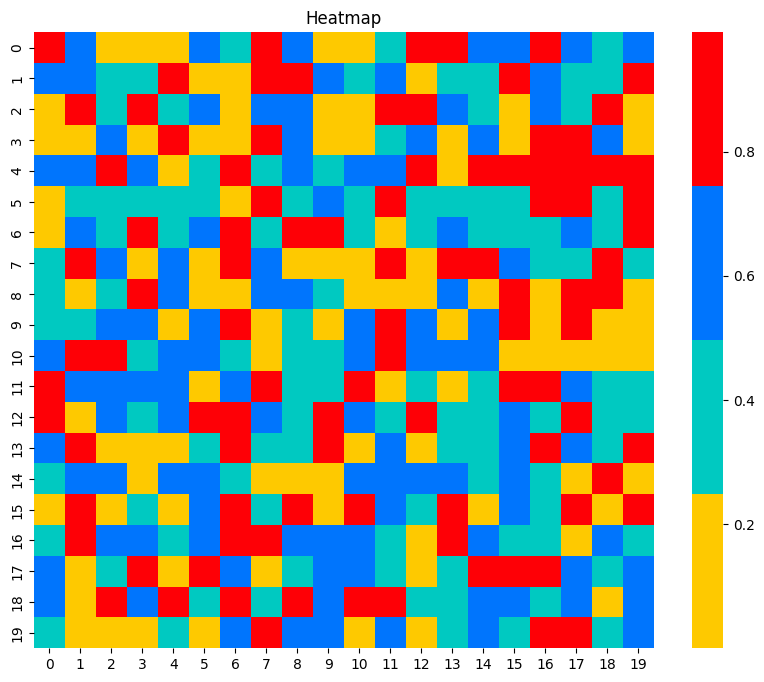

In [80]:
# Generar datos ficticios
data = np.random.rand(20, 20)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=False, cmap=custom_cmap)
plt.title('Heatmap')
plt.show()


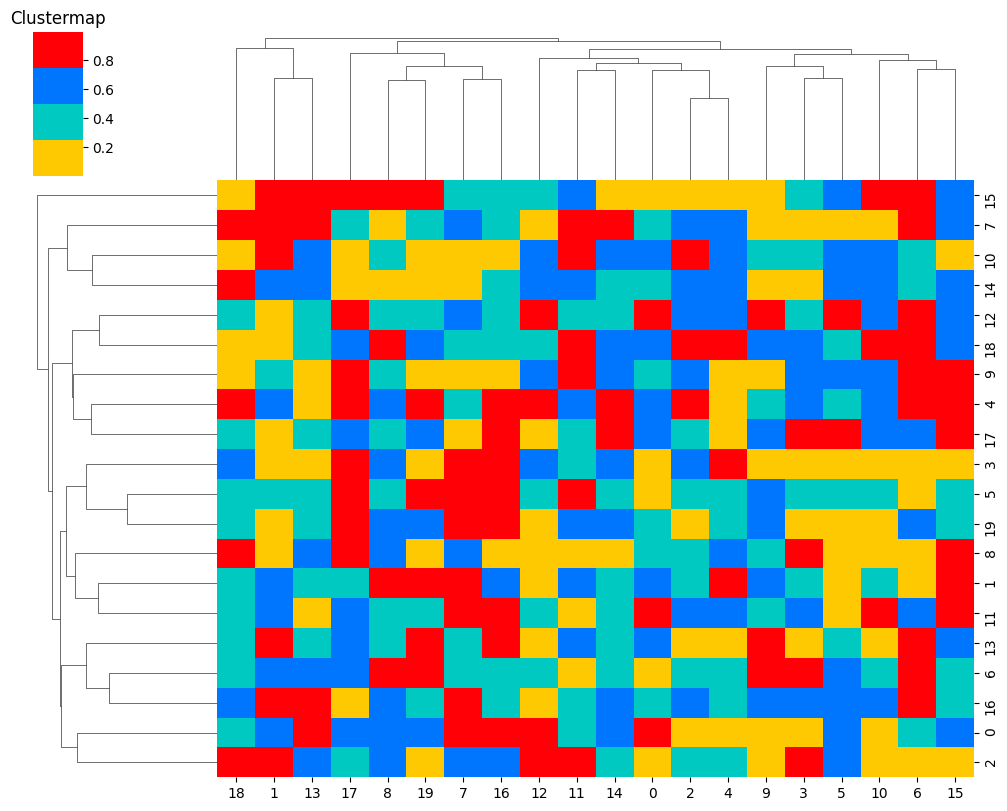

In [81]:
# Crear el clustermap
sns.clustermap(data, cmap=custom_cmap, figsize=(10, 8))
plt.title('Clustermap')
plt.show()


### Propuesto
Generación de mapas locales

In [73]:
import plotly.express as px
import pandas as pd
import json

# Cargar datos ficticios
data = {
    'comuna': ['Santiago', 'Providencia', 'Las Condes', 'Vitacura', 'Ñuñoa'],
    'value': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Cargar archivo GeoJSON con los límites de las comunas de Santiago
with open('data/santiago_comunas.geojson', 'r') as f:
    geojson = json.load(f)

# Crear el mapa coroplético
fig = px.choropleth(df, 
                    geojson=geojson, 
                    locations='comuna', 
                    featureidkey="properties.NOM_COM", 
                    color='value',
                    color_continuous_scale='Viridis',
                    labels={'value':'Valor'},
                    title='Mapa Coroplético de Santiago de Chile')

# Actualizar el layout del mapa
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Mostrar el mapa
fig.show()
